<a href="https://colab.research.google.com/github/vondersam/sdgs_text_classifier/blob/master/experiments/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import spacy
from collections import Counter
from  itertools import chain

# Code heavily inspired from the following posts
# http://www.davidsbatista.net/blog/2017/04/01/document_classification/
# https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

In [0]:
#!python -m spacy download en_core_web_lg
#nlp = spacy.load("en_core_web_lg")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_dir = "gdrive/My Drive/fastai-v3/sdgs/dataset/"
labelled_dataset = base_dir + "cleanup_labelled.csv"
unlabelled_dataset = base_dir + "cleanup_unlabelled_u.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Unlabelled Data

In [4]:
unlabelled = pd.read_csv(unlabelled_dataset)
# Number of total tokens
#unlabelled['tokens'] = unlabelled['text'].apply(lambda x: nlp(x))
print(f"Number of unlabelled texts: {unlabelled.count()['text']}")

Number of unlabelled texts: 248303


# Labelled Data

In [5]:
labelled = pd.read_csv(labelled_dataset)
labelled['labels'] = labelled.labels.str.split('|')
print(f"Number of labelled texts: {labelled.count()['text']}")

Number of labelled texts: 5182


## Number of texts per label

In [6]:
txt_per_label = pd.Series(Counter(chain(*labelled.labels))).sort_index().rename_axis('label_id').reset_index(name='count')
txt_per_label.label_id = txt_per_label.label_id.astype('int')
txt_per_label.sort_values(by='label_id', inplace=True)
txt_per_label

,label_id,count
0,1,438
9,2,457
10,3,523
11,4,381
12,5,482
13,6,423
14,7,477
15,8,395
16,9,301
1,10,317


Text(0.5, 1.0, 'Number of documents per label')

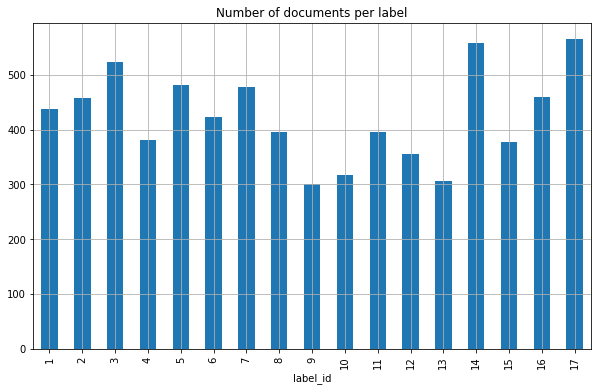

In [7]:
txt_per_label.plot(x='label_id', y='count', kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title("Number of documents per label")

## Number of labels per text

In [45]:
labels_per_text = labelled.labels.str.len()
labels_per_text = labels_per_text.value_counts().sort_index()
labels_per_text = labels_per_text.to_frame()
labels_per_text['percentage'] = labels_per_text.values/labels_per_text.values.sum()*100
labels_per_text.round(2)

,labels,percentage
1,4419,85.28
2,317,6.12
3,159,3.07
4,84,1.62
5,80,1.54
6,47,0.91
7,40,0.77
8,12,0.23
9,3,0.06
10,3,0.06


Text(0.5, 0, 'Number of labels')

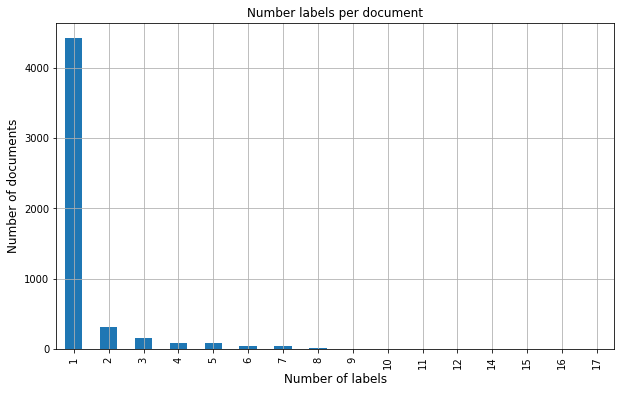

In [35]:
labels_per_text.plot(kind='bar', legend=False, grid=True, figsize=(10, 6))
plt.title("Number labels per document")
plt.ylabel('Number of documents', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

## String length

Max string length: 6394
Min string length: 5
Mean string length: 502.43110768043226
Histogram of string lengths by document


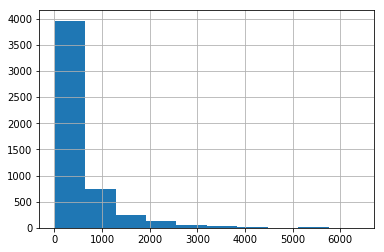

In [10]:
lens = labelled.text.str.len()
lens.hist()

print(f"Max string length: {lens.max()}")
print(f"Min string length: {lens.min()}")
print(f"Mean string length: {lens.mean()}")
print("Histogram of string lengths by document")